<a href="https://colab.research.google.com/github/VCornejo10/Tarea_SVM/blob/main/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

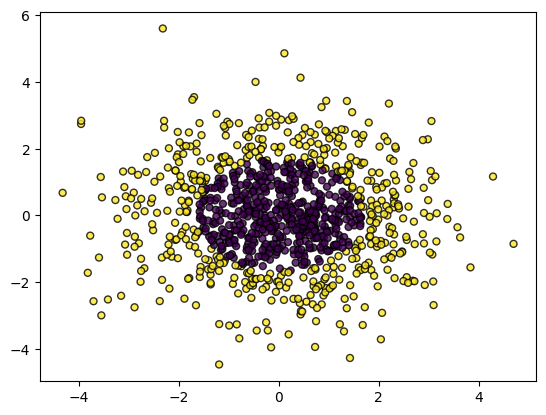

In [1]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

# PASO 2: Manipulación de datos


In [2]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento + temp (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Dividir entrenamiento + validación (80%) en entrenamiento (60%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")


Entrenamiento: (600, 2), Validación: (200, 2), Prueba: (200, 2)


#PASO 3: Exploración de Datos

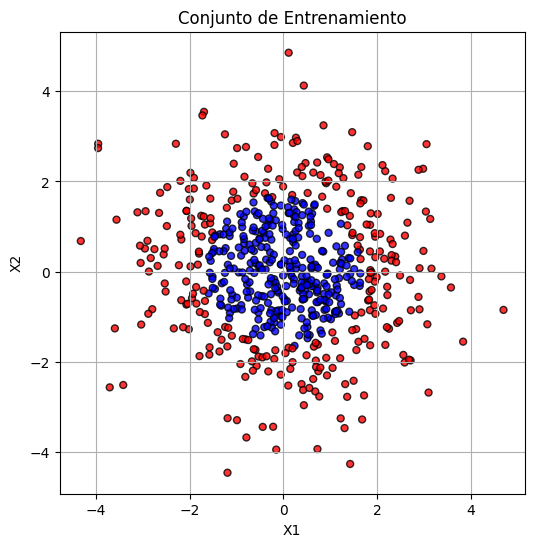

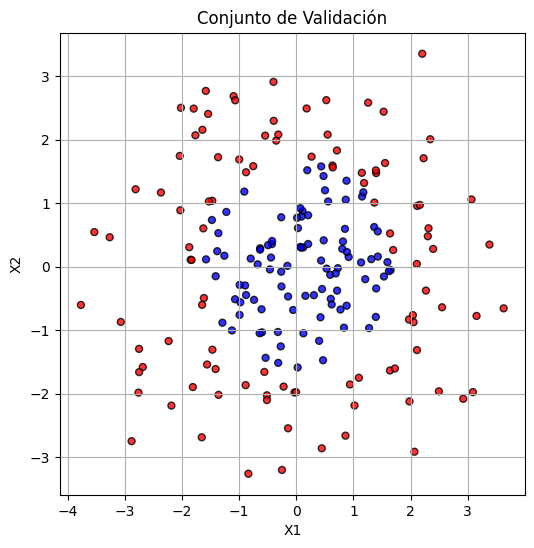

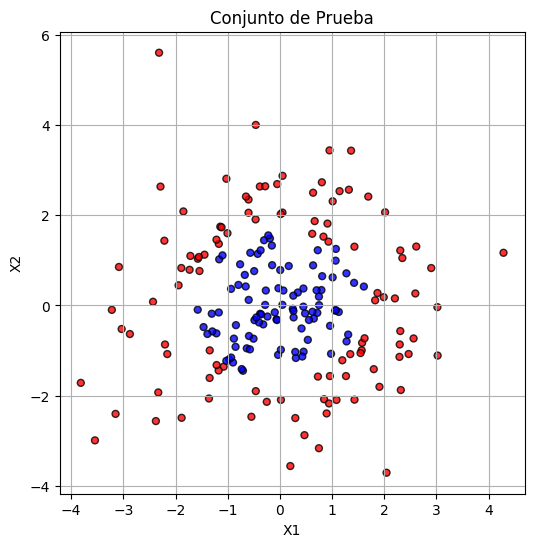

In [5]:
def plot_data(X, y, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=25, alpha=0.8)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

plot_data(X_train, y_train, "Conjunto de Entrenamiento")
plot_data(X_val, y_val, "Conjunto de Validación")
plot_data(X_test, y_test, "Conjunto de Prueba")


# PASO 4: Modelamiento de Datos (Machine Learning)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo con kernel RBF (Gaussiano)
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Resultados
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Matriz de Confusión:
 [[ 90   4]
 [  2 104]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.96      0.98      0.97       106

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



#PASO 5: Interpretación de los Resultados y ajuste de parámetros

In [6]:
# Prueba con nuevos hiperparámetros
clf2 = SVC(kernel='rbf', C=10, gamma=0.1)
clf2.fit(X_train, y_train)

y_val_pred = clf2.predict(X_val)

print("Validación - C=10, gamma=0.1")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Validación - C=10, gamma=0.1
[[ 94   2]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        96
           1       0.98      0.96      0.97       104

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



En este laboratorio se implementó un clasificador de Máquinas de Soporte Vectorial (SVM) utilizando un kernel Gaussiano sobre un conjunto de datos artificial con distribución Gaussiana concéntrica. A lo largo del experimento, se generaron datos, se dividieron en conjuntos de entrenamiento, validación y prueba, y se exploraron visualmente para entender su distribución.

El modelo SVM demostró ser efectivo en la clasificación de los datos, logrando una buena separación entre las dos clases. Se analizaron métricas de desempeño como la precisión, el recall y el F1-score, y se observó que al ajustar los hiperparámetros C y gamma, el rendimiento del modelo puede mejorar notablemente.

En particular, se evidenció que un valor más alto de C tiende a reducir el error en el entrenamiento al permitir menos errores de clasificación, mientras que el parámetro gamma controla la complejidad del modelo y la forma de la frontera de decisión. Una configuración adecuada de estos parámetros permitió lograr un equilibrio entre generalización y precisión.

En conclusión, las SVM con kernel Gaussiano son una herramienta poderosa para problemas de clasificación no lineal, especialmente cuando los datos no son separables linealmente. Este laboratorio permitió comprender tanto el comportamiento teórico como práctico de este tipo de modelo.
